In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [23]:
# read data
data_path = "C:\\Repository\\DS-Intership\\clean_data\\"
item_categories = pd.read_csv(data_path + "item_categories.csv", index_col=0)
items = pd.read_csv(data_path + "items.csv", index_col=0)
sales_train = pd.read_csv(data_path + "sales_train.csv", index_col=0)
sample_submission = pd.read_csv(data_path + "sample_submission.csv", index_col=0)
shops = pd.read_csv(data_path + "shops.csv", index_col=0)
test = pd.read_csv(data_path + "test.csv", index_col=0)
sales_per_months = pd.read_csv(data_path + "sales_per_months.csv", index_col=0)

In [24]:
# we can try to check what clusters have low/high sales
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [97]:
item_categories.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ KB


In [25]:
# for checking the most popular items 
items.head(5)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [98]:
items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 692.8+ KB


In [26]:
# can try check how time (seasons, special months) correlation with sales
# can check for shops with largest amount of sales
# can compare sales of cheap items vs expensive
# corr matrix

sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0
5,2013-01-10,0,25,2564,349.00,1.0


In [100]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928491 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 156.4+ MB


In [27]:
# for check how time (every month) influence on sales
sales_per_months.head()

,ID,item_cnt_month
month_year,,
2013-01,5122,1.0
2013-01,5127,3.0
2013-01,5142,2.0
2013-01,5143,9.0
2013-01,5152,1.0


In [102]:
sales_per_months.info()

<class 'pandas.core.frame.DataFrame'>
Index: 599912 entries, 2013-01 to 2015-10
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              599912 non-null  int64  
 1   item_cnt_month  599912 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 29.9+ MB


In [28]:
# check what shops have best income
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [103]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [30]:
# clusters by sales
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [104]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 6.5 MB


## EDA

###### checking of sales distributuon:

C:\Users\maxim\AppData\Local\Temp\ipykernel_17940\3682997020.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_per_months.item_cnt_month)


<Axes: xlabel='item_cnt_month', ylabel='Density'>

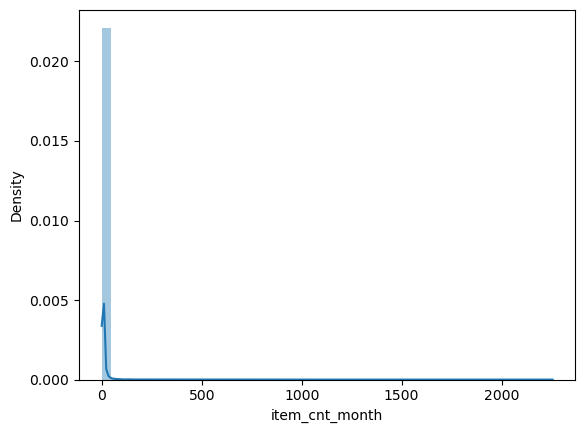

In [49]:
sns.distplot(sales_per_months.item_cnt_month)

In [46]:
df = sales_per_months[sales_per_months.item_cnt_month<1000]

C:\Users\maxim\AppData\Local\Temp\ipykernel_17940\107776459.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


<Axes: ylabel='Density'>

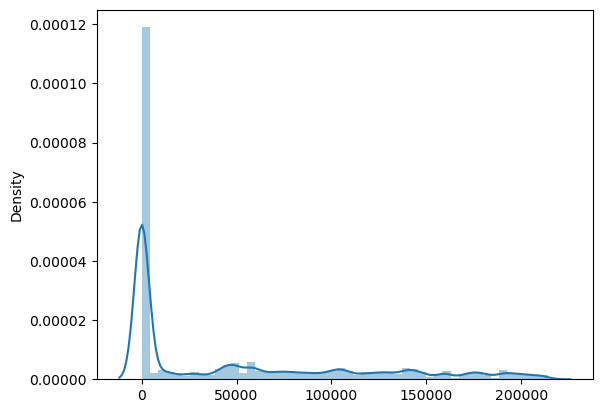

In [47]:
sns.distplot(df)

In [39]:
sales_per_months.describe()

,ID,item_cnt_month
count,599912.000000,599912.000000
mean,98550.754301,2.701725
std,58056.072708,11.292584
min,0.000000,1.000000
25%,49330.000000,1.000000
50%,94305.000000,1.000000
75%,143391.000000,2.000000
max,214199.000000,2253.000000


In [58]:
sales_per_months['item_cnt_month'].value_counts().head(10)

1.0     359827
2.0     110095
3.0      45867
4.0      24420
5.0      15036
6.0       9872
7.0       6615
8.0       5004
9.0       3550
10.0      2823
Name: item_cnt_month, dtype: int64

###### checking for corr between time and sales:

C:\Users\maxim\AppData\Local\Temp\ipykernel_17940\457552482.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


[Text(0, 0, '2013-01'),
 Text(1, 0, '2013-02'),
 Text(2, 0, '2013-03'),
 Text(3, 0, '2013-04'),
 Text(4, 0, '2013-05'),
 Text(5, 0, '2013-06'),
 Text(6, 0, '2013-07'),
 Text(7, 0, '2013-08'),
 Text(8, 0, '2013-09'),
 Text(9, 0, '2013-10'),
 Text(10, 0, '2013-11'),
 Text(11, 0, '2013-12'),
 Text(12, 0, '2014-01'),
 Text(13, 0, '2014-02'),
 Text(14, 0, '2014-03'),
 Text(15, 0, '2014-04'),
 Text(16, 0, '2014-05'),
 Text(17, 0, '2014-06'),
 Text(18, 0, '2014-07'),
 Text(19, 0, '2014-08'),
 Text(20, 0, '2014-09'),
 Text(21, 0, '2014-10'),
 Text(22, 0, '2014-11'),
 Text(23, 0, '2014-12'),
 Text(24, 0, '2015-01'),
 Text(25, 0, '2015-02'),
 Text(26, 0, '2015-03'),
 Text(27, 0, '2015-04'),
 Text(28, 0, '2015-05'),
 Text(29, 0, '2015-06'),
 Text(30, 0, '2015-07'),
 Text(31, 0, '2015-08'),
 Text(32, 0, '2015-09'),
 Text(33, 0, '2015-10')]

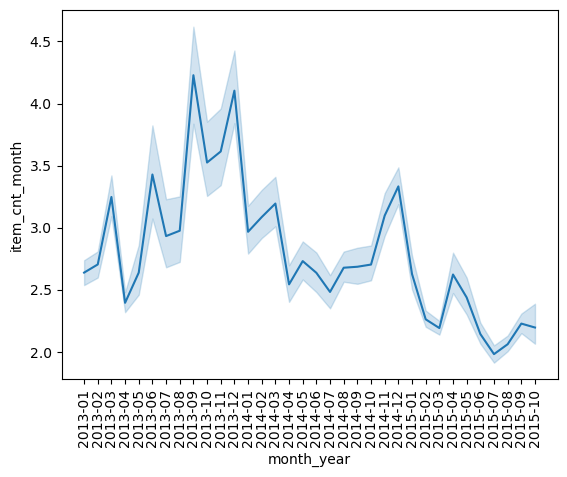

In [71]:
g = sns.lineplot(x=sales_per_months.index, y=sales_per_months.item_cnt_month)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

###### check for shops with largest/smallest amount of sales

In [75]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [76]:
test

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [83]:
shops_month = shops.merge(test, how='inner', on='shop_id')

In [85]:
shops_month = sales_per_months.merge(shops_month, how='inner', on='ID')

In [95]:
shops_month.groupby('shop_name')['item_cnt_month'].agg(sum).sort_values(ascending=False).head(10)

shop_name
Москва ТЦ "Семеновский"            160333.0
Москва ТРК "Атриум"                123810.0
Москва ТЦ "МЕГА Теплый Стан" II    100108.0
СПб ТК "Невский Центр"              83076.0
Якутск Орджоникидзе, 56             67785.0
Воронеж (Плехановская, 13)          51502.0
Интернет-магазин ЧС                 46744.0
Якутск ТЦ "Центральный"             43036.0
Сергиев Посад ТЦ "7Я"               42388.0
Сургут ТРЦ "Сити Молл"              42204.0
Name: item_cnt_month, dtype: float64

In [96]:
shops_month.groupby('shop_name')['item_cnt_month'].agg(sum).sort_values(ascending=False).tail(10)

shop_name
Самара ТЦ "ПаркХаус"                     21994.0
Самара ТЦ "Мелодия"                      21725.0
Томск ТРЦ "Изумрудный Город"             19647.0
Адыгея ТЦ "Мега"                         19083.0
Балашиха ТРК "Октябрь-Киномир"           16902.0
Жуковский ул. Чкалова 39м?               13429.0
РостовНаДону ТРК "Мегацентр Горизонт"    12634.0
Тюмень ТРЦ "Кристалл"                    12588.0
Н.Новгород ТРЦ "РИО"                      5318.0
Новосибирск ТРЦ "Галерея Новосибирск"      327.0
Name: item_cnt_month, dtype: float64

###### corr matrix

In [113]:
sales_train.drop(columns=['date']).corr()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
date_block_num,1.000000,0.019328,0.009473,0.095497,0.009434
shop_id,0.019328,1.000000,0.029344,-0.023966,-0.005325
item_id,0.009473,0.029344,1.000000,-0.134759,0.016269
item_price,0.095497,-0.023966,-0.134759,1.000000,0.012008
item_cnt_day,0.009434,-0.005325,0.016269,0.012008,1.000000


In [115]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0
5,2013-01-10,0,25,2564,349.00,1.0


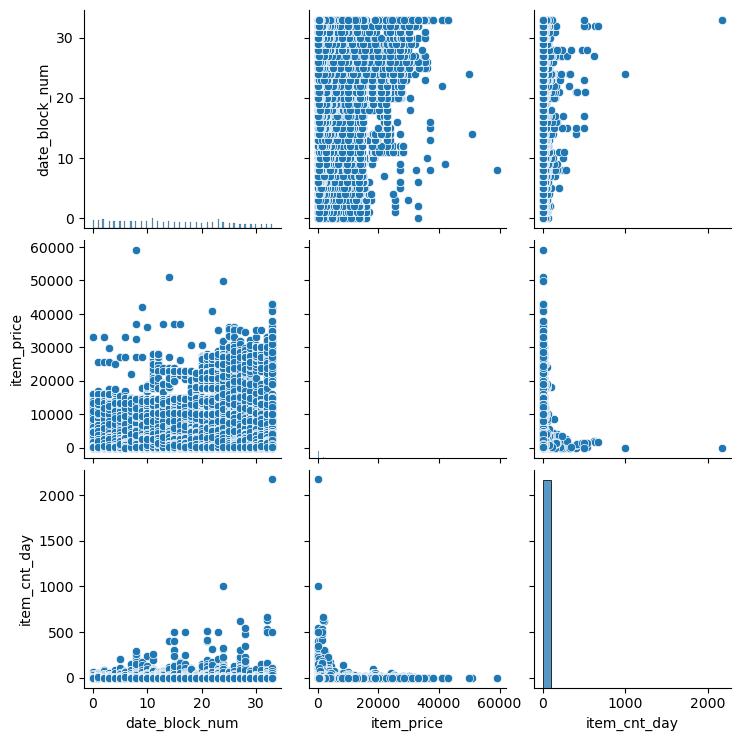

In [117]:
sns.pairplot(sales_train.drop(columns=['shop_id', 'item_id']))